In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [183]:
car_data = pd.read_csv("CarPrice.csv", sep=",")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [184]:
car_data.tail()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [185]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [186]:
# car_data.loc[:,'CarName', "horsepower", "highwaympg"]

In [187]:
car_data.shape

(205, 26)

In [188]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [189]:
car_data.describe()
# car_data.drop_duplicates(inplace= True)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [190]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [191]:
car_data.isnull().sum()/ car_data.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [192]:
car_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [193]:
car_data = car_data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]


car_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


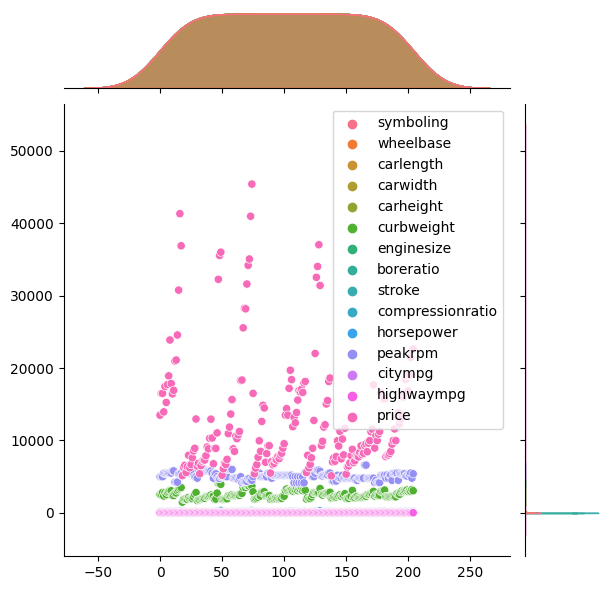

In [194]:
sns.jointplot(data=car_data)
plt.show()


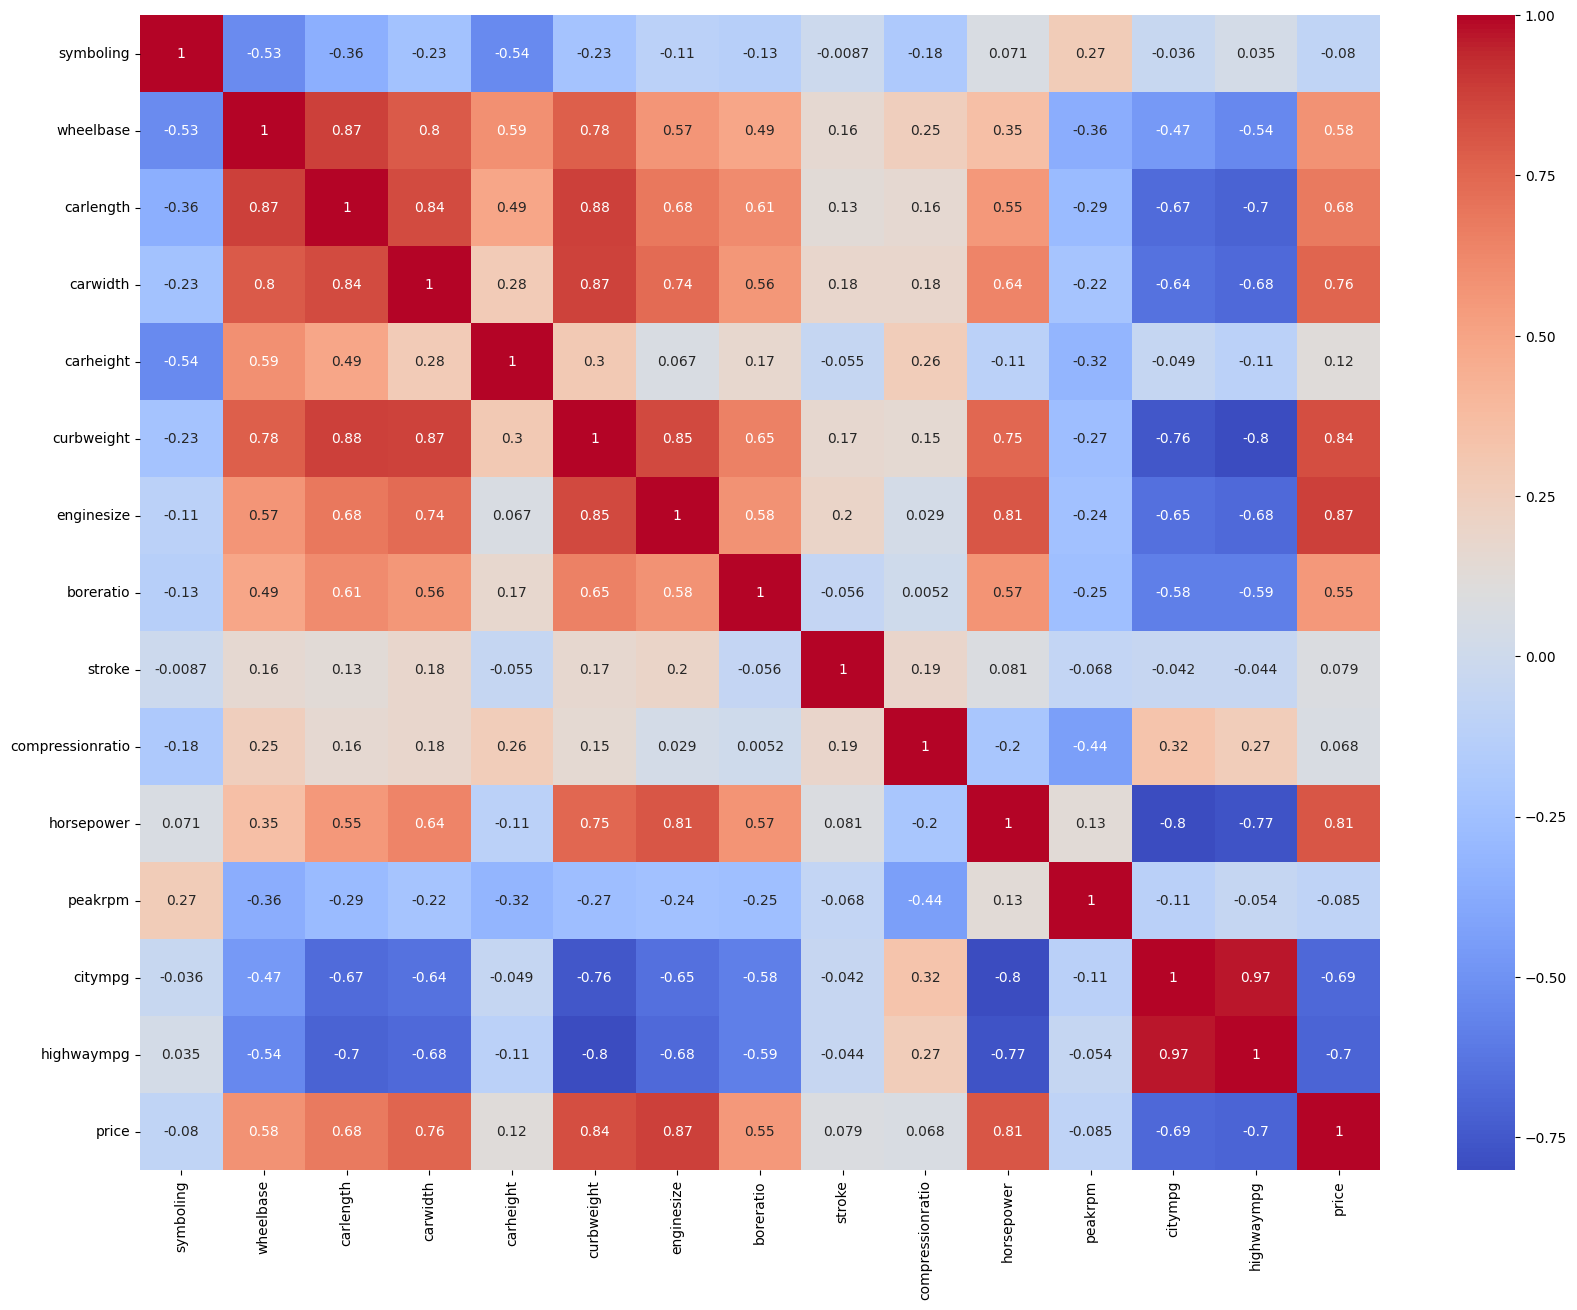

In [195]:
plt.figure(figsize=(20, 15))
correlations = car_data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [196]:
predict = "price"
x = car_data.drop([predict], 1)
y = car_data[predict]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

/var/folders/lq/7btllx4953scrkzwd28d3q040000gp/T/ipykernel_2113/2068684041.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = car_data.drop([predict], 1)


In [197]:
xtrain

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
102,0,100.4,184.6,66.5,56.1,3296,181,3.43,3.27,9.0,152,5200,17,22
19,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70,5400,38,43
178,3,102.9,183.5,67.7,52.0,2976,171,3.27,3.35,9.3,161,5200,20,24
143,0,97.2,172.0,65.4,52.5,2340,108,3.62,2.64,9.0,94,5200,26,32
17,0,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182,5400,15,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,3,95.9,173.2,66.3,50.2,2921,156,3.59,3.86,7.0,145,5000,19,24
60,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,84,4800,26,32
183,2,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,9.0,85,5250,27,34
126,3,89.5,168.9,65.0,51.6,2756,194,3.74,2.90,9.5,207,5900,17,25


In [198]:
xtest

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
37,0,96.5,167.5,65.2,53.3,2236,110,3.15,3.58,9.00,86,5800,27,33
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.20,76,6000,31,38
85,1,96.3,172.4,65.4,51.6,2365,122,3.35,3.46,8.50,88,5000,25,32
69,0,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.50,123,4350,22,25
10,2,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.80,101,5800,23,29
103,0,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,9.00,152,5200,19,25
81,3,96.3,173.0,65.4,49.4,2328,122,3.35,3.46,8.50,88,5000,25,32
194,-2,104.3,188.8,67.2,56.2,2912,141,3.78,3.15,9.50,114,5400,23,28
141,0,97.2,172.0,65.4,52.5,2145,108,3.62,2.64,9.50,82,4800,32,37
168,2,98.4,176.2,65.6,52.0,2536,146,3.62,3.50,9.30,116,4800,24,30


In [199]:
ytrain

102    14399.0
19      6295.0
178    16558.0
143     9960.0
17     36880.0
        ...   
83     14869.0
60      8495.0
183     7975.0
126    32528.0
63     10795.0
Name: price, Length: 164, dtype: float64

In [200]:
ytest

37      7895.0
31      6855.0
85      6989.0
69     28176.0
10     16430.0
103    13499.0
81      8499.0
194    12940.0
141     7126.0
168     9639.0
48     35550.0
12     20970.0
128    37028.0
109    12440.0
121     6692.0
44      8916.5
147    10198.0
77      6189.0
199    18950.0
117    18150.0
113    16695.0
107    11900.0
6      17710.0
116    17950.0
43      6785.0
59      8845.0
129    31400.5
202    21485.0
5      15250.0
125    22018.0
185     8195.0
74     45400.0
36      7295.0
21      5572.0
133    12170.0
162     9258.0
97      7999.0
82     12629.0
67     25552.0
112    16900.0
195    13415.0
Name: price, dtype: float64

In [201]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [202]:
model.score(xtrain, ytrain)

0.8434898541217635

In [203]:
predictions = model.predict(xtest)
predictions

array([10371.05721803,  7788.26536061,  9984.47832611, 23700.77466274,
       13680.7352583 , 21707.97559244,  9794.55370796, 17176.71478673,
        9177.18009082, 13262.65809899, 30651.06362344, 15515.62930742,
       26015.52553862, 16841.06508691,  6139.78169321,  6337.41560922,
       11888.24470694,  7575.88208914, 18008.35480413, 20304.86921566,
       19563.89188656, 15811.47750925, 19511.78414207, 18557.84470889,
        5713.47188739, 10346.2279103 , 36446.40640244, 24257.95412306,
       15078.55951302, 20633.13173377, 10364.31876643, 37362.13256046,
        9068.28887804,  5557.58332309, 14691.31763614,  6749.98331752,
        6018.4136945 , 15100.86098496, 24108.30692917, 18557.84470889,
       17988.79544348])

In [204]:
print('R2_score:', r2_score(ytest, predictions))
print('Mean Absolute Error:', mean_absolute_error(ytest, predictions))
print('Mean Squared Error:', mean_squared_error(ytest, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, predictions)))

R2_score: 0.8439831224546139
Mean Absolute Error: 2887.977900605906
Mean Squared Error: 13319790.22535024
Root Mean Squared Error: 3649.628779115794
